In [1]:
import time
import lhapdf
import numpy as np
from random import sample
import sys
sys.path.insert(0, '../src/compressor')
from pdf_grid import XGrid, PdfSet
from estimators import Estimators, NormalizationK
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Physical Parameters
pdfname = "NNPDF31_nnlo_as_0118"
Qscale  = 1
nf = 3
# construct grid
x = XGrid().build_xgrid()

In [3]:
# Construct input pdf set
pdf = PdfSet(pdfname, x, Qscale, nf).build_pdf()
pdf.shape

(101, 6, 104)

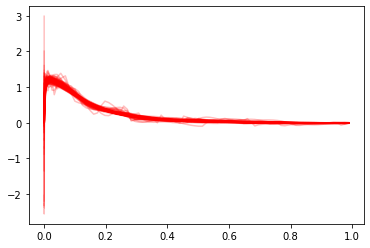

In [4]:
plt.figure()
for p in range(pdf.shape[0]):
    plt.plot(x, pdf[p][3], color="red", alpha=.25)
plt.show()

In [5]:
# Toy PDF
A = np.random.uniform(1,2,size=[3,4,5])
A

array([[[1.29251201, 1.81134007, 1.58916167, 1.24122035, 1.20430055],
        [1.32703722, 1.18408112, 1.53057482, 1.61192895, 1.31337225],
        [1.71989852, 1.27881647, 1.60311706, 1.7136699 , 1.62861461],
        [1.46810398, 1.71862931, 1.47650309, 1.58192772, 1.29966677]],

       [[1.63860719, 1.03831774, 1.19911135, 1.19018451, 1.37409833],
        [1.80867485, 1.13113534, 1.29418811, 1.56121825, 1.6919673 ],
        [1.40331139, 1.49828339, 1.75559687, 1.51659201, 1.92282353],
        [1.44795307, 1.13232803, 1.44476215, 1.42427038, 1.01153263]],

       [[1.21264867, 1.49395027, 1.97061687, 1.18232794, 1.26421231],
        [1.16596726, 1.85093822, 1.3525246 , 1.18746183, 1.91776295],
        [1.98533527, 1.89839184, 1.34953402, 1.92461448, 1.16814122],
        [1.9069133 , 1.37854471, 1.76243659, 1.83831833, 1.40340014]]])

In [6]:
est = Estimators(A)

In [7]:
mean = est.mean()
mean

array([[1.38125596, 1.44786936, 1.58629663, 1.2045776 , 1.2808704 ],
       [1.43389311, 1.38871823, 1.39242917, 1.45353634, 1.64103416],
       [1.70284839, 1.55849723, 1.56941599, 1.71829213, 1.57319312],
       [1.60765678, 1.40983402, 1.56123394, 1.61483881, 1.23819985]])

In [8]:
stdev = est.stdev()
stdev

array([[0.18487253, 0.31726274, 0.31497233, 0.0261081 , 0.0703133 ],
       [0.27304688, 0.32755285, 0.10054502, 0.18927868, 0.24935606],
       [0.23791592, 0.25649911, 0.16747852, 0.16660654, 0.3105801 ],
       [0.21176616, 0.24037687, 0.14286066, 0.1706288 , 0.16577831]])

In [9]:
fl, xgrid = 0, 1
print(f'mean={np.mean(np.array([A[i][fl][xgrid] for i in range(A.shape[0])]))}')
print(f'stdev={np.std(np.array([A[i][fl][xgrid] for i in range(A.shape[0])]))}')

mean=1.4478693561447529
stdev=0.317262738808767


In [10]:
region1 = mean - 2 * stdev
region1

array([[1.01151089, 0.81334388, 0.95635198, 1.15236139, 1.14024379],
       [0.88779935, 0.73361252, 1.19133914, 1.07497898, 1.14232205],
       [1.22701654, 1.04549902, 1.23445895, 1.38507905, 0.95203291],
       [1.18412446, 0.92908027, 1.27551263, 1.27358121, 0.90664322]])

In [12]:
est.kolmogorov_smirnov().shape

(4, 5, 6)

In [14]:
B = np.random.uniform(1,2,size=[5,10,100])
estb = Estimators(B)
estb.kolmogorov_smirnov().shape

(10, 100, 6)

In [15]:
# Test with PDF
estpdf = Estimators(pdf)
estpdf.kolmogorov_smirnov().shape

(6, 104, 6)

In [ ]:
# Check Normalization
norm = NormalizationK(pdf, 1)
%time cfd68x = norm.cfd68("mean", pdfRed)
print(cfd68x[0].shape)
print(cfd68x[1].shape)
%time cfd68z = norm.cfd68("stdev", pdfRed)
print(cfd68z[0].shape)
print(cfd68z[1].shape)